***
**Optimisation numérique -- M1 Maths & I.A. 2022/2023 -- Université Paris-Saclay**
***

$\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\nr}[1]{\|#1\|}
\newcommand{\abs}[1]{|#1|}
\newcommand{\eps}{\varepsilon}
\newcommand{\sca}[2]{\langle#1|#2\rangle}
\newcommand{\D}{\mathrm{D}}
\newcommand{\hdots}{\dots}
\newcommand{\cond}{\mathrm{cond}}$

# TP 4: Projection sur un polyèdre et application en débruitage

Dans ce TP, on cherche à appliquer l'algorithme d'Uzawa au calcul de la projection d'un point $p\in \Rsp^d$ sur un polyèdre $K$, c'est-à-dire un ensemble convexe défini par un nombre fini d'inégalités affines:

$$ K = \{ x\in \Rsp^d \mid \forall 1\leq i\leq k, c_i(x) \leq 0 \} $$

où $c_i(x) := \sca{a_i}{x} - b_i \leq 0$. 
Dans la suite, on note $x\leq y$ où $x,y$ sont deux vecteurs si $\forall i, x_i\leq y_i$. En posant $A$ la 
matrice possédant $k$ lignes notées $a_1,\hdots,a_k \in \Rsp^d$ et $b\in\Rsp^k$, on a donc

$$ K = \{ x \in \Rsp^d\mid Ax \leq b\} $$


## Partie I: Étude et mise en oeuvre de l'algorithme d'Uzawa

Dans cette première partie, on donne un algorithme permettant de calculer la projection d'un point $p \in \Rsp^d$ sur le polyèdre $K$:

$$ (P) := \min_{x\in K} \frac{1}{2} \nr{x - p}^2 $$

Le lagrangien $L$ du problème (P) est donné par

$$L: (x,\lambda)\in\Rsp^d\times \Rsp^k_+ \mapsto f(x) + \sum_{1\leq i\leq k} \lambda_i c_i(x)$$

où $f(x) = \frac{1}{2} \nr{x - p}^2$, et le problème dual associé à (P) est donc

$$ (D) := \max_{\lambda \in \Rsp^k_+} \min_{x\in \Rsp^d} L(x,\lambda) $$

On rappelle que si $\lambda^*$ est un maximiseur de (D), alors tout solution du problème de minimisation *sans contrainte* $(P_{\lambda^*}) = \min_{x\in\Rsp^d} L(x,\lambda^*)$ est aussi solution du problème (P). En d'autre terme, la connaissance de $\lambda^*$ permet de remplacer un problème d'optimisation avec contraintes $(P)$ par un problème d'optimisation sans contrainte $(P_{\lambda^*})$ !

Nous allons étudier dans cette partie l'algorithme d'Uzawa. L'idée est de calculer un maximiseur $\lambda^*$ du problème dual (D) par une méthode de gradient projeté, et de s'en servir pour calculer la solution de (P) en utilisant le dernier rappel. 

**Q1) [Expression du problème dual]** Dans cette question, il s'agit d'écrire le problème dual de manière plus explicite.

- Montrer que le lagrangien associé au problème (P) peut s'écrire $L(x,\lambda) = \frac{1}{2}\nr{x - p}^2  + \sca{\lambda}{A x - b}$.
- Étant donné $\lambda \in \Rsp^k$, donner l'expression de l'unique solution $x_\lambda$ du problème de minimisation $\min_{x \in \Rsp^d} L(x,\lambda).$ Pour cela, poser $f_\lambda(x) = L(x,\lambda)$ et calculer son miniseur sur $\Rsp^d$.
- En déduire l'expression suivante du problème dual 

$$\begin{aligned}
&\qquad (D) := - \min_{\lambda \in M} h(\lambda) \\
&\hbox{ où } h(\lambda) =  \frac{1}{2} \nr{A^T \lambda - p}^2 - \frac{1}{2}\nr{p}^2 + \sca{\lambda}{b} \hbox{ et } M=\Rsp_+^k
\end{aligned}$$

En particulier, le problème dual est un problème d'optimisation avec contraintes ($x\in M$), mais l'ensemble de contraintes est très simple.

- Montrer que $\nabla h(\lambda) = A(A^T \lambda - p) + b = b - A x_\lambda$.

> **Réponse:** 
On vérifie facilement que
$
 \sup_{\lambda \in\Rsp_+^k} \sca{\lambda}{A x - b} 
$ 
vaut $0$ si $x \in K$ et $+\infty$ sinon. Ainsi,
$$ (P) = \inf_{x}\sup_{\lambda \in\Rsp_+^k} \frac{1}{2} \nr{x - p}^2 +\sca{\lambda}{A x - b}.$$
Le problème dual est construit en échangeant l'ordre de l'inf et du sup:
$$ (D) = \sup_{\lambda \in\Rsp_+^k} \inf_{x} \frac{1}{2} \nr{x - p}^2 +\sca{\lambda}{A x - b}.$$
On étudie donc le problème de minimisation à $\lambda$ fixé :
$$
\min_{x} \ell(x,\lambda)=\min_{x} \frac{1}{2} \nr{x - p}^2 + \sca{\lambda}{A x - b}. 
$$
La fonction à minimiser (en $x$, et à $\lambda$ fixé) est coercive et fortement convexe, elle admet donc un unique minimiseur $x_\lambda$ vérifiant la condition $ \nabla_x \ell (x,\lambda) =0$ (car le problème d'optimisation n'est pas contraint), soit 
$ x_\lambda-p +A^T \lambda =0$ donc $x_\lambda = p - A^T \lambda$. On reporte dela dans $\ell$
et on trouve 
$$
\frac{1}{2} \nr{x - p}^2 +\sca{\lambda}{A x - b} =\frac{1}{2} \nr{- A^T \lambda}^2 + \sca{A^t\lambda}{p - A^T\lambda}-\sca{\lambda}{b} =\frac{1}{2} \nr{ A^T \lambda}^2- \sca{A^t\lambda}{ A^T \lambda} + \sca{A^T\lambda}{p}-\sca{\lambda}{b}$$
$$
= -\frac{1}{2} \nr{ A^T \lambda}^2 + \sca{A^T\lambda}{p}-\frac{1}{2} \nr{p}^2+\frac{1}{2} \nr{p}^2-\sca{\lambda}{b} = -\frac{1}{2} \nr{A^T \lambda - p}^2+\frac{1}{2}\nr{p}^2 - \sca{\lambda}{b} =-h(\lambda)
$$

Pour calculer $\nabla h$, on remarque d'abord que la differentielle de $h$ en $\lambda$ dans la direction $\xi$ s'écrit $Dh(\lambda)\xi= \sca{A^T \lambda - p}{A^t\xi}+\sca{b}{\xi}$. Par définition du gradient on a $Dh(\lambda)\xi = \sca{\nabla h(\lambda)}{\xi}$ d'ou $\nabla h(\lambda) = A(A^T \lambda - p) + b.$ (Une autre manière d'obtenir la même formule consisterait à écrire $h(\lambda) = \frac{1}{2} \sca{\lambda}{Q\lambda} + \sca{c}{\lambda} + d$ pour une matrice symétrique $Q$, d'où l'on déduirait immédiatement $\nabla h(\lambda) = Q\lambda + c$.

On a déja calculé dans la question précédente $x_\lambda = p - A^T \lambda$ et donc $\nabla h(\lambda) = b - A x_\lambda$.


**Algorithme d'Uzawa:** on appelle ainsi l'algorithme du gradient projeté pour le problème dual (D):
$$ \begin{cases}
\lambda^{(0)} = 0 \in \Rsp^k \\
g^{(k)} = \nabla h(\lambda^{(k)})\\
\lambda^{(k+1)} = p_{\Rsp_+^k}(\lambda^{(k)} - \tau g^{(k)})\\
x^{(k+1)} = p - A^T \lambda^{(k+1)} \quad (\in \arg\min_{x\in\Rsp^d} \ell(x,\lambda^{(k+1)}))
\end{cases}
$$
L'algorithme est arrêté lorsque $\nr{x^{(k)} - x^{(k+1)}}\leq \eps$.

Pour l'implémentation de l'algorithme, on rappelle que $p_{\Rsp_+^k}(v) = (\max(v_1,0),\hdots,\max(v_k,0))$.


**Q2) [Convergence de l'algorithme d'Uzawa]** On pose  $S_\tau(\lambda) := p_{\Rsp_+^k}(\lambda - \tau \nabla h(\lambda))$, de sorte que $\lambda^{(k+1)} = S_\tau(\lambda^{(k)})$. 
- Montrer que la fonction $h$ est convexe.
- En déduire que si $\lambda^*$ est un point fixe de $S_\tau$, alors $\lambda^*$ est solution du problème (D) (i.e. maximise $h$ sur $\Rsp_+^k$).

> **Réponse:** 
Soit $\lambda^*$ un point fixe de $S_\tau$. C'est à dire 
$$
\lambda^*= p_{\Rsp_+^k}(\lambda^* - \tau \nabla h(\lambda^*))
$$
en particulier par définition de la projection cela implique que pour tout $\lambda \in \Rsp_+^k$ 
$$
\sca{\lambda-\lambda^*}{\lambda^* - \tau \nabla h(\lambda^*)-\lambda^*}\leq 0 
$$
donc pour tout $\lambda \in \Rsp_+^k$  
$$
\sca{\lambda-\lambda^*}{\nabla h(\lambda^*)}\geq 0, 
$$
Ainsi, en se souvenant que $h$ convexe vérifie $h(\lambda)\geq h(\lambda^*) + \sca{\lambda-\lambda^*}{\nabla h(\lambda^*)}$, on en déduit que $\lambda^*$ est donc l'unique minimiseur de $h$ sur $\Rsp_+^k$ c'est à dire l'unique maximiseur de $(D)$. 

Ainsi, si la suite $(\lambda^{(k)})$ converge, sa limite est un maximiseur $\lambda^*$ de (D) et $x_{\lambda^*} = x^*$ est un minimiseur de (P).


**Q3) [Mise en oeuvre]** Mettre en oeuvre l'algorithme d'Uzawa.
* Écrire une une fonction `projection_convexe(A,b,p,tau,err=1e-6)` calculant les itérées de $(\lambda^{(k)}, x^{(k)})$, en arrêtant la boucle dès que $\nr{x^{(k)}- x^{(k+1)}} \leq$ `err`. 
Cette fonction retournera $\lambda^{(k)}, x^{(k)}$.
* Tester cette fonction sur le convexe $K = \{ x \in \Rsp^2\mid \nr{x}_1 \leq 1 \}$. On commencera par déterminer $A,b$ tel que $K = \{x \mid Ax \leq b \}$. On vérifiera la validité du calcul de deux manières:
  - visuellement, en affichant le segment reliant p à son projeté q = `projection_convexe(A,b,p,tau)`, pour un assez grand nombre (100) de points p choisis aléatoirement dans $[-4,4]^2$.
  - en vérifiant que la solution $x,\lambda$ = projection_convexe(A,b,p,tau) satisfait (à erreur numérique près) les quatre conditions du théorème de Karush-Kuhn-Tucker: $Ax \leq b$ *(admissibilité de $x$)*, $\lambda \geq 0$ *(admissibilité de $\lambda$)*, $\forall i, (A x - b)_i \lambda_i = 0$ *(complémentarité)* et $\nabla_x \ell(x,\lambda) = 0$ *(optimalité)*.
* Recommence avec $K = \{ x \in\Rsp^2 \mid \nr{x}_\infty \leq 1 \}$.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# la commande suivante agrandit les figures
plt.rcParams['figure.figsize'] = [9.,6.]

def projection_convexe(A,b,p,tau,err=1e-6):
    ld = np.zeros(len(b))
    x = p - np.dot(A.T,ld)
    for i in range(100):
        g = b - np.dot(A,x)
        ld = np.maximum(ld - tau*g,0)
        xnew = p - np.dot(A.T,ld)
        if np.linalg.norm(x - xnew) <= err:
            break
        x = xnew
    return x,ld


Verification des conditions du theoreme KKT
1. x verifie les contraintes (Ax <= b): True
2. lambda >= 0: True
2. |grad_x l(x,lambda)| = 8.627380855737225e-07
3. (Ax -b)_i lambda_i = 0: True
Valeur de (P): 0.01870724492085051
Valeurs de (D): 0.018708079313812326


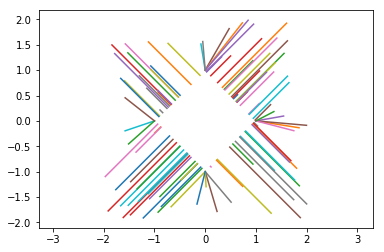

In [2]:
A = np.array([[0,1], [0,-1], [1,0], [-1,0]])
b = np.array([1,1,1,1])

A = np.array([[1,1], [1,-1], [-1,1], [-1,-1]])
b = np.array([1,1,1,1])

#t = np.linspace(0,2*np.pi,10)[:-1]
#A = np.array([np.cos(t), np.sin(t)]).T
#b = np.ones(9)

for i in range(100):
    p = 4*(np.random.rand(2)-.5)
    x,ld = projection_convexe(A,b,p,tau=0.1)
    
    if i==0:
        print('Verification des conditions du theoreme KKT')
        print('1. x verifie les contraintes (Ax <= b): %r' % (np.max(np.dot(A,x)-b) < 1e-4))
        print('2. lambda >= 0: %r' % (np.min(ld) > -1e-4))
        print('2. |grad_x l(x,lambda)| = %r' % np.linalg.norm(x-p + np.dot(A.T,ld)))
        print('3. (Ax -b)_i lambda_i = 0: %r' % (np.max(np.abs((np.dot(A,x) - b)*ld)) < 1e-4))
        print('Valeur de (P): %r' % (.5*np.linalg.norm(x - p)**2))
        print('Valeurs de (D): %r' % 
              (- .5*np.linalg.norm(np.dot(A.T,ld) - p)**2 + .5*np.linalg.norm(p)**2 - np.dot(ld,b)))
        
    plt.plot([p[0],x[0]], [p[1],x[1]],)
    plt.axis('equal')


## Partie II: Régression isotone

Nous allons considérer deux problèmes de débruitage consistant simplement à projeter sur un convexe. Les données sont par exemple des séries temporelles $y = (y_1,\hdots,y_n)\in \Rsp^n$, mesurées avec un bruit. On sait que les données réelles appartiennent à un certain ensemble convexe $K$ de $\Rsp^n$. Deux exemples

- régression isotone: $K = \{ x\in \Rsp^n \mid \forall 1\leq i < n,~x_{i+1}\geq x_i \}$
- régression convexe: $K = \{ x\in \Rsp^n \mid \forall 1 < i < n,~x_{i} \leq \frac{1}{2} (x_{i-1} + x_{i+1}) \}$.

À cause du bruit, le vecteur $y$ mesuré n'appartient pas à l'ensemble $K$. L'idée est simplement de débruiter le signal en le projetant sur $K$, soit:

$$ (P) := \min_{x\in K} \frac{1}{2} \nr{x - p}^2 $$

**Q1)** Implémenter la régression isotone.
- Trouver une matrice $A$ et un vecteur $b$ tel que $K_{iso} = \{ x\in \Rsp^n \mid Ax \leq b \}$.
- Utiliser projection_convexe() avec tau=0.1 et avec le vecteur $p$ donné ci-dessous.
- Que peut-on dire expérimentalement de la solution $x^*$ aux points $\{i,i+1\}$ où $y_{i}\geq y_{i+1}$ ? 
- Démontrer ce résultat en utilisant les conditions du théorème KKT.

0.9945218953682728


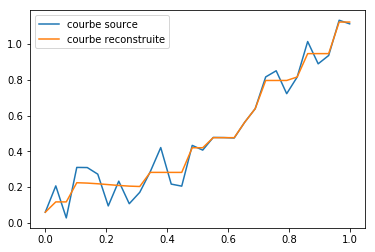

In [3]:
n = 30
t = np.linspace(0,1,n)
p = t**2 + .3*np.random.rand(n)

A = - np.eye(n,n) + np.eye(n,n,-1)
A = A[1:,:]
k = A.shape[0]
b = np.zeros(k)

tau = .5
print(np.max(np.abs(np.linalg.eigvals(np.eye(k)- tau*np.dot(A,A.T)))))

x,ld = projection_convexe(A,b,p,tau=.1,err=1e-6)
plt.plot(t,p,label='courbe source')
plt.plot(t,x,label='courbe reconstruite')
plt.legend()


**Q2)** Implémenter la régression convexe en utilisant projection_convexe() avec tau=0.1 et avec le vecteur $p$ donné ci-dessous. 

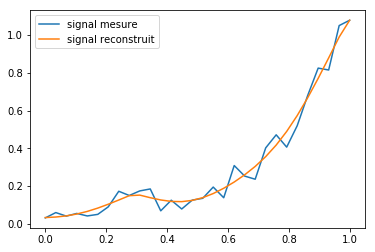

In [4]:
p = t**4 + .2*np.random.rand(n)

n = 30
t = np.linspace(0,1,n)

A = - np.eye(n,n) + np.eye(n,n,-1)
A = A[1:,:]
A = -np.dot(A.T,A)
k = A.shape[0]
b = np.zeros(k)

x,ld = projection_convexe(A,b,p,tau=0.1,err=1e-6)
plt.plot(t,p,label='signal mesure')
plt.plot(t,x,label='signal reconstruit')
plt.legend()
